In [1]:
import pandas as pd 
import tensorflow as tf 
import numpy as np 
import math as m
from matplotlib import pyplot as plt 

In [2]:
#math constants 
pi = 3.14159265359 
g = 9.81

In [3]:
#wheel velocity 

rpm = 3400
W = (rpm/60) * 2 * pi
r = 0.09
v0 = W * r * 0.5 
print(v0)

16.022122533309


In [4]:
#tennisbal constants

k = 1.5

C = 0.5
rho = 1.292
A = 0.003316625

cor = 0.66666
cof = 0.72

In [5]:
#launcher constants

theta = 10*pi/180
s0 = 1

In [6]:
#velocity

v0x = v0 * m.cos(theta)
vx = v0x
v0y = v0 * m.sin(theta)
print(v0x,v0y)

15.77871049051427 2.78221238026555


In [7]:
#time 

t = 0
tf = 3.0*v0y/g
dt = tf/2000

In [8]:
A = g/k

B = v0y + A

x = v0x/-k * m.exp(t*-k)
y = B/-k * m.exp(t*-k)-A*t

cx = -v0x/-k * m.exp(0*-k)
cy = B/-k * m.exp(0*-k)-A*0


In [9]:
i = 0 
x = []
y = []

In [10]:

#### first motion

while B/-k * m.exp(t*-k)-A*t-(cy-1) >= 0: 
        t = t + dt
        x.append(v0x/-k * m.exp(t*-k)+cx)
        y.append(B/-k * m.exp(t*-k)-A*t-(cy-1)) 
        #print(x[i],y[i])
        i = i + 1

In [11]:
v0x2 = v0x * cof
v0y2 = -(v0y-g*t) * cor

xref = x[i-1]

t = 0 
tf = 2.0*v0/g
dt = tf/2000

A = g/k

B = v0y2 + A

cx = -v0x2/-k * m.exp(0*-k)
cy = B/-k * m.exp(0*-k)-A*0


In [12]:
#### second motion

while B/-k * m.exp(t*-k)-A*t-(cy) >= 0:
        t = t + dt 
        x.append(v0x2 /-k * m.exp(t*-k)+cx + xref)
        y.append(B/-k * m.exp(t*-k)-A*t-cy) 
        #print(x[i],y[i])
        i = i + 1 

12.120158679652


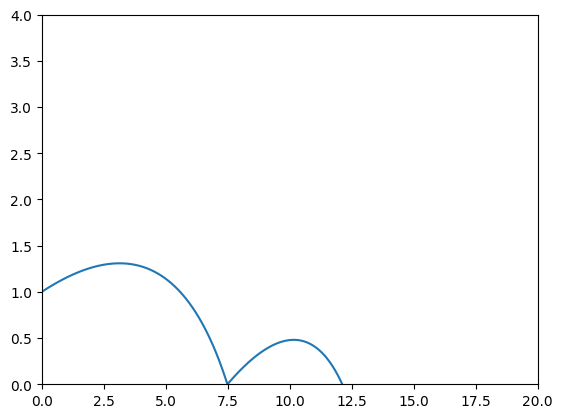

In [13]:
print(x[i-1])
plt.plot(x,y)
plt.xlim(0, 20)
plt.ylim(0, 4)
plt.show()